# Introduction to Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 1. Introduction to Linear Regression

In [4]:
# Read in the data
students = pd.read_csv('test_data.csv')
print(students.columns)

# Write equation for a line
y = 9.85 * students.hours_studied + 43

Index(['score', 'hours_studied', 'breakfast'], dtype='object')


- A dataset has been loaded containing fictional data from a group of students who were surveyed about their studying and breakfast choices prior to a math test. 
- The data is loaded as a variable named students.
- Create a scatter plot with `hours_studied` on the x-axis and score on the y-axis.

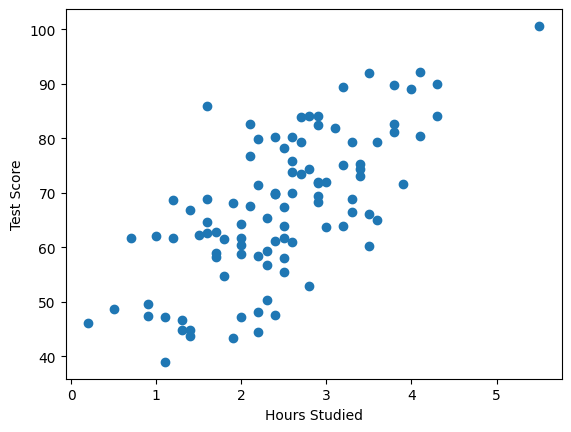

In [5]:
plt.scatter(students.hours_studied, students.score)
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.show()

- If you had to draw a line on top of this plot to describe the relationship between hours studied and math score, what would that line look like?
- Code for the line plot (`plt.plot(students.hours_studied, y)`). 
- Does this line look correct?

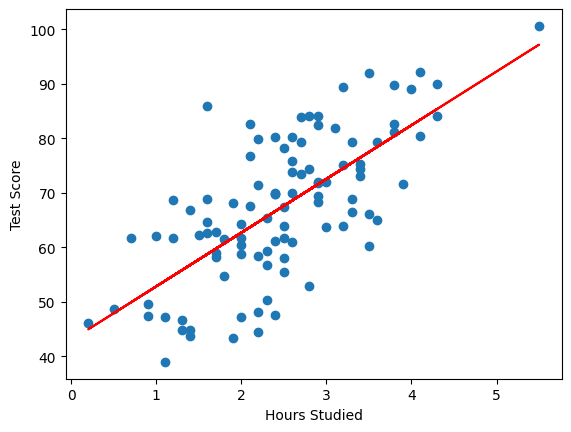

In [6]:
plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, y, color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.show()

## 2. Equation of a Line

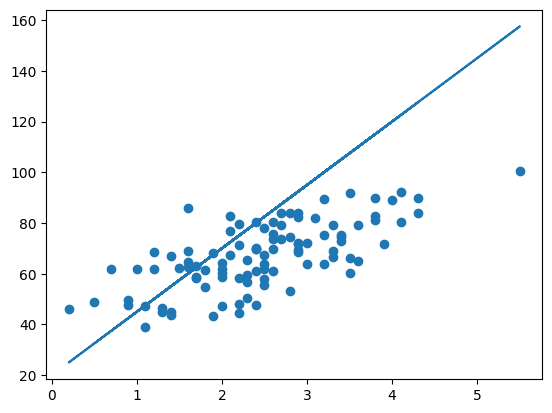

In [7]:
# Read in the data
students = pd.read_csv('test_data.csv')

# Write equation for a line
predicted_score = 25 * students.hours_studied + 20

# Create the plot
plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, predicted_score)
plt.show()

- We’ve again plotted `score` (as the y-variable) against `hours_studied` (the x-variable), with a line going through the points. 
- Let’s see if we can improve this line so that it better fits the data. 
- To start, the line appears to be too steep. 
- Edit the equation of the line so that the slope is `10`.
- This should make the line less steep (because we are decreasing the slope). 
- Does this fit the data better or worse?

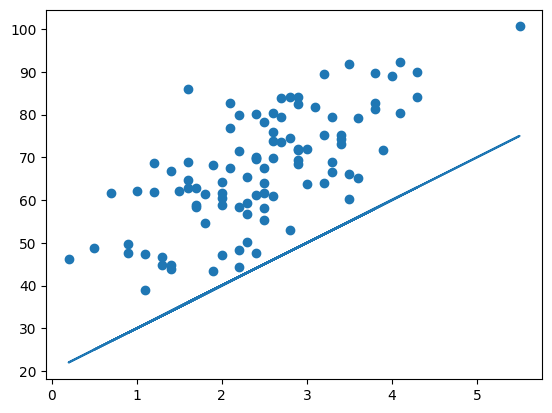

In [8]:
predicted_score = 10 * students.hours_studied + 20

plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, predicted_score)
plt.show()

- The line now appears to be parallel to the points but still sits below them! 
- Leaving the slope of the line equal to `10`, edit the equation of the line so that the y-intercept is `45`.
- This should move the line upward (because we are increasing the y-intercept). 
- Does this new line fit the data well?

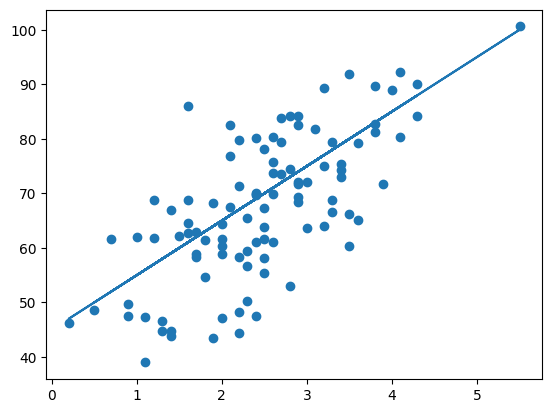

In [9]:
predicted_score = 10 * students.hours_studied + 45

plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, predicted_score)
plt.show()

## 4. Fitting a Linear Regression Model in Python

In [6]:
# Read in the data
students = pd.read_csv('test_data.csv')
students.columns

Index(['score', 'hours_studied', 'breakfast'], dtype='object')

- Using the `students` dataset
- Create a linear regression model that predicts student `score` using `hours_studied` as a predictor and save the result as a variable named `model`.

In [14]:
model = sm.OLS.from_formula('score ~ hours_studied', data=students)

- `'score ~ hours_studied'`:
    - `score` is the target variable we want to predict (label)
    - `hours_studied` is the predictor variable (feature)

- Fit the model using the `.fit()` method on model (created in the previous step), and save the fitted model as `results`.

In [15]:
results = model.fit()

- Print out the model coefficients using `.params`.

In [16]:
results.params

Intercept        43.016014
hours_studied     9.848111
dtype: float64

The Formula is looking like:
$$ y = mx + b $$
$$ y = 9,848111 \cdot x + 43,016014 $$


If we have more that one predictor, the formula will be:
$$ y = m_1 \cdot x_1 + m_2 \cdot x_2 + ... + m_n \cdot x_n + b $$

## 5. Using a Regression Model for Prediction

In [17]:
# Read in the data
students = pd.read_csv('test_data.csv')

# Fit the model
model = sm.OLS.from_formula('score ~ hours_studied', students)
results = model.fit()

- You’ll see the code (from the previous exercise) to fit a model that predicts test `score` using `hours_studied`. 
- Print the coefficients of this model using `.params`.

In [18]:
results.params

Intercept        43.016014
hours_studied     9.848111
dtype: float64

- Using your model, what is the predicted score for a student who spent 3 hours studying? 
- Save the result as `pred_3hr` and print it out. 
- Calculate your answer by plugging into the formula for a line (instead of using `.predict()`).

In [19]:
pred_3hr = results.params[1]*3 + results.params[0]
pred_3hr

C:\Users\larsk\AppData\Local\Temp\ipykernel_6768\1203124079.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_3hr = results.params[1]*3 + results.params[0]


np.float64(72.56034698735527)

- What is the predicted score for a student who spent 5 hours studying? 
- Use the `.predict()` method to calculate your answer and save it as `pred_5hr`, then print it out.

In [23]:
pred_5hr = results.predict({'hours_studied': [5]})
pred_5hr

0    92.256569
dtype: float64

## 6. Interpreting a Regression Model

- The intercept for the OLS regression model predicting `score` based on `hours_studied` is `43`.
- Give a one-sentence interpretation of the intercept for this model. 
- Does this intercept make sense in real life?

In [24]:
# A student who studied for 0 hours is expected to score a 43 on the test.

- The slope for the OLS regression model predicting `score` based on `hours_studied` is `9.8`. 
- Give a one-sentence interpretation of the slope for this model.

In [25]:
# For every additional 1 hour of studying, students are expected to score 9.8 
# points higher on the test.

## 7. Assumptions of Linear Regression Part 1

In [10]:
# Read in the data
students = pd.read_csv('test_data.csv')

# Fit the model
model = sm.OLS.from_formula('score ~ hours_studied', students)
results = model.fit()

students.score.head()

0    73.5
1    92.2
2    55.4
3    64.6
4    66.9
Name: score, dtype: float64

- The Code above already contains the code to fit a model on the `students` dataset that predicts test `score` using `hours_studied` as a predictor. 
- Calculate the fitted values for this model and save them as `fitted_values`.

In [11]:
fitted_values = results.predict(students.hours_studied)
fitted_values.head()

0    69.605914
1    83.393269
2    67.636291
3    58.772991
4    56.803369
dtype: float64

- Calculate the residuals for this model and save the result as `residuals`.
- Residual values are calculated as:
$$ residuals = observed\_values - fitted\_values $$
- So its the **difference** between the observed values and the predicted values.

In [13]:
residuals = students.score - fitted_values

- Print out the first 5 values in `residuals` and inspect them. 
- Can you make sense of these numbers? What is the difference between a positive and negative residual?

In [16]:
residuals.head()

# These numbers tell us how far the true test students are from the predicted 
# test students based on the model. A positive residual means that the student 
# scored higher than predicted based on the model; a negative residual means 
# that the student scored lower than predicted.

0     3.894086
1     8.806731
2   -12.236291
3     5.827009
4    10.096631
dtype: float64

## 8. Assumptions of Linear Regression Part 2

In [17]:
# Read in the data
students = pd.read_csv('test_data.csv')

# Fit the model
model = sm.OLS.from_formula('score ~ hours_studied', students)
results = model.fit()

# Calculate fitted values
fitted_values = results.predict(students)

# Calculate residuals
residuals = students.score - fitted_values

- Your code to calculate the residuals and fitted values for the model of score predicted by hours studied. 
- Plot a histogram of the residuals to check the normality assumption. 
- Is this assumption met?

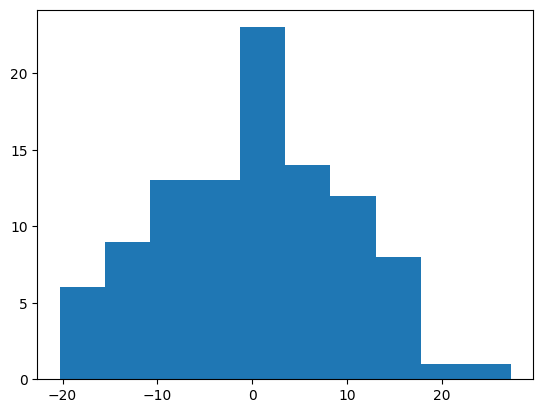

In [18]:
plt.hist(residuals)
plt.show()

- Now, check the homoscedasticity assumption by plotting the residuals against the fitted values (`fitted_values` on the x-axis and `residuals` on the y-axis). 
- Is this assumption met?

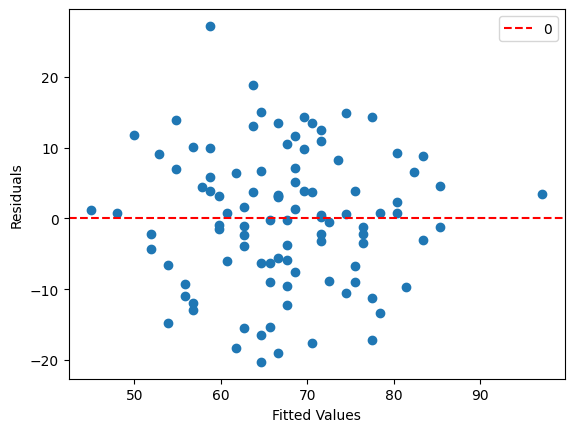

In [24]:
plt.scatter(fitted_values, residuals)
# plot a dashed line at y = 0
plt.axhline(0, linestyle='--', color='red', label='0')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

## 9. Categorical Predictors

In [25]:
# Read in the data
students = pd.read_csv('test_data.csv')

# Calculate group means
print(students.groupby('breakfast').mean().score)

breakfast
0    61.664151
1    73.721277
Name: score, dtype: float64


- Using the dataset `students`, plot a scatter plot of `score` (y-axis) against `breakfast` (x-axis) to see scores for students who did and did not eat breakfast.

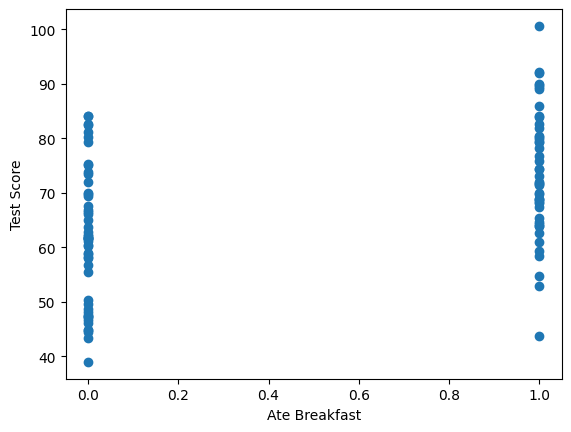

In [27]:
plt.scatter(students.breakfast, students.score)
plt.xlabel('Ate Breakfast')
plt.ylabel('Test Score')
plt.show()

- Calculate the mean test score for students who ate breakfast and the mean score for students who did not eat breakfast. 
- Use these numbers to plot the best-fit line on top of the scatter plot.

In [31]:
mean_score = students.groupby('breakfast').mean().score
mean_score

breakfast
0    61.664151
1    73.721277
Name: score, dtype: float64

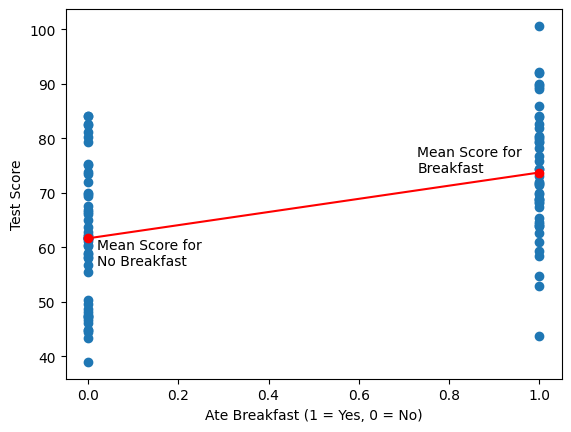

In [52]:
plt.scatter(students.breakfast, students.score)
plt.plot(mean_score.index, mean_score.values, marker='o', color='red')
plt.xlabel('Ate Breakfast (1 = Yes, 0 = No)')
plt.ylabel('Test Score')
plt.text(0.02, mean_score[0] - 5, "Mean Score for\nNo Breakfast")
plt.text(0.73, mean_score[1], "Mean Score for\nBreakfast")
plt.show()

## 10. Categorical Predictors: Fit and Interpretation

In [53]:
# Read in the data
students = pd.read_csv('test_data.csv')

# Calculate and print group means
mean_score_no_breakfast = np.mean(students.score[students.breakfast == 0])
mean_score_breakfast = np.mean(students.score[students.breakfast == 1])
print('Mean score (no breakfast): ', mean_score_no_breakfast)
print('Mean score (breakfast): ', mean_score_breakfast)

Mean score (no breakfast):  61.664150943396216
Mean score (breakfast):  73.72127659574468


- Create and fit a regression model of `score` predicted by `breakfast` using `sm.OLS.from_formula()` and print out the coefficients.

In [55]:
model = sm.OLS.from_formula('score ~ breakfast', students)
results = model.fit()
results.params

Intercept    61.664151
breakfast    12.057126
dtype: float64

- **Intercept**: 
    - The mean of the `score` for students who did not eat breakfast.
    - The mean of the variable on the left side
- **Slope (here, `breakfast`):**
    - The difference between the mean of the `score` for students who ate breakfast and the mean of the `score` for students who did not eat breakfast.

- The mean test score for students who ate breakfast (saved as `mean_score_breakfast`) and the mean score for students who did not eat breakfast (saved as `mean_score_no_breakfast`). 
- Calculate and print the difference in mean scores. 
- Can you find how this number relates to the regression output?

In [56]:
diff_mean_scores = mean_score_breakfast - mean_score_no_breakfast
diff_mean_scores

np.float64(12.057125652348468)

The difference is the slope of the regression model.

## 11. Review

- A new `dataset` named website has been loaded, containing simulated data for a sample of visitors to a website, including the amount of time in seconds they spent on the website (`time_seconds`), their age (`age`), and information about whether they accessed the website using Chrome or Safari (`browser`).

In [110]:
# Read in the data
website = pd.read_csv('website.csv')

# Print the first five rows
print(website.head())

   time_seconds   age browser
0         486.0  47.1  Chrome
1         645.7  64.6  Chrome
2         345.0  45.4  Safari
3         413.4  34.4  Chrome
4         426.4  31.3  Safari


### 1.

- Create a plot of `time_seconds` (vertical axis) versus `age` (horizontal axis). 
- Is there a linear relationship between these variables?

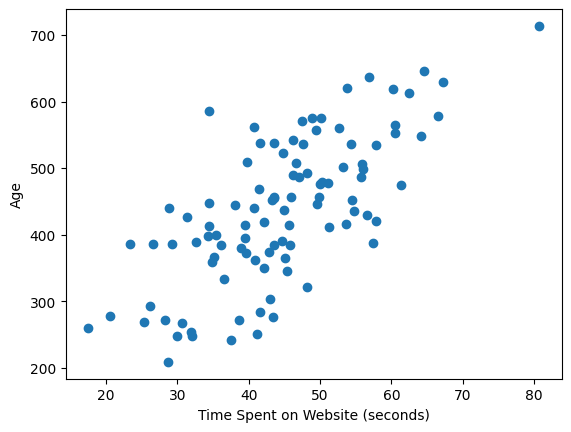

In [63]:
plt.scatter(website.age, website.time_seconds)
plt.xlabel('Time Spent on Website (seconds)')
plt.ylabel('Age')
plt.show()

### 2.

- Fit a linear model to predict `time_seconds` using the `age` variable

In [71]:
model = sm.OLS.from_formula('time_seconds ~ age', website)
results = model.fit()
results.params

Intercept    128.967945
age            6.913758
dtype: float64

### 3.

- Use the coefficients from the linear model to plot the regression line on top of your original plot.

C:\Users\larsk\AppData\Local\Temp\ipykernel_13572\1216853003.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(website.age, results.params[0] + results.params[1]*website.age, color='red')


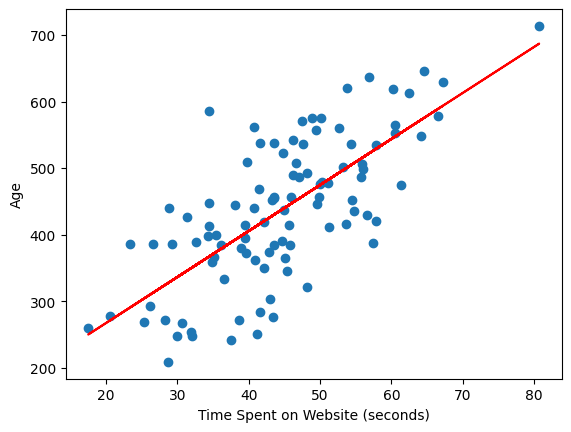

In [69]:
plt.scatter(website.age, website.time_seconds)
plt.plot(website.age, results.params[0] + results.params[1]*website.age, color='red')
plt.xlabel('Time Spent on Website (seconds)')
plt.ylabel('Age')
plt.show()

### 4.

- Calculate the fitted values and residuals

In [75]:
fitted_values = results.predict(website)
residuals = website.time_seconds - fitted_values

In [76]:
fitted_values.head()

0    454.605928
1    575.596686
2    442.852540
3    366.801206
4    345.368558
dtype: float64

In [77]:
residuals.head()

0    31.394072
1    70.103314
2   -97.852540
3    46.598794
4    81.031442
dtype: float64

### 5.

- Check the normality assumption by plotting a histogram of the residuals. 
- Are they approximately normally distributed?

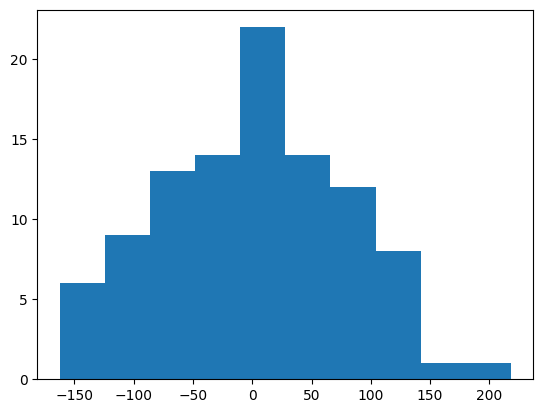

In [78]:
plt.hist(residuals)
plt.show()

### 6.

- Check the homoscedasticity assumption by plotting a the residuals against the fitted values. 
- Is this assumption satisfied?

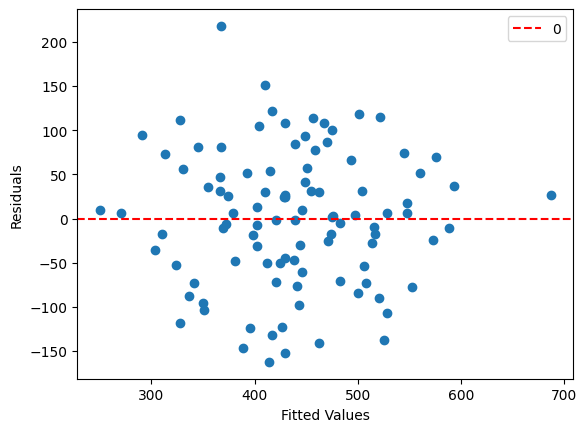

In [79]:
plt.scatter(fitted_values, residuals)
plt.axhline(0, linestyle='--', color='red', label='0')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### 7.

- Use your model to predict the amount of time that a 40 year old person will spend on the website.

In [80]:
pred = results.predict({'age': [40]})
pred

0    405.518249
dtype: float64

### 8.

- Fit another model that predicts `time_seconds` based on `browser`.

In [105]:
mean_score_safari = np.mean(website.time_seconds[website.browser == 'Safari'])
mean_score_chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])

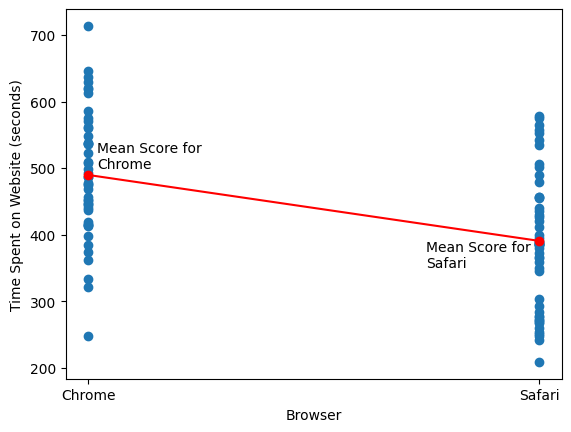

In [128]:
plt.scatter(website.browser, website.time_seconds)
plt.plot(["Chrome", "Safari"], [mean_score_chrome, mean_score_safari], marker='o', color='red')
plt.xticks(["Chrome", "Safari"])
plt.xlabel('Browser')
plt.ylabel('Time Spent on Website (seconds)')
plt.text(0.02, mean_score_chrome+10, "Mean Score for\nChrome")
plt.text(0.75, mean_score_safari-40, "Mean Score for\nSafari")
plt.show()

In [104]:
model = sm.OLS.from_formula('time_seconds ~ browser', website)
results = model.fit()
results.params

Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64

### 9.

- Print out the coefficients. 
- What is the difference in average time spent on each browser?

In [114]:
mean_score_chrome, mean_score_safari, mean_score_chrome - mean_score_safari

(np.float64(489.70425531914884),
 np.float64(390.64716981132074),
 np.float64(99.0570855078281))